<a href="https://colab.research.google.com/github/abosedealli/LSTM-Multivariate-vs-Univariate/blob/main/stock_dataset_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
!pip install tensorflow
import tensorflow as tf
import random

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importing the libraries to Predict the closing price stock price 

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import History 
import seaborn as sns
import keras
from keras.callbacks import History 
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [90]:
sns.set_style('whitegrid')
from datetime import datetime

## Stocks to use for analysis

---

Apple dataset from inception till till 9/1/2023 in US currency except date and volume.



In [97]:
data = pd.read_csv("/content/tran_appledataset.csv")


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10564 entries, 0 to 10563
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10100 non-null  object 
 1   High       10100 non-null  float64
 2   Low        10100 non-null  float64
 3   Open       10100 non-null  float64
 4   Close      10100 non-null  float64
 5   Volume     10100 non-null  float64
 6   Adj Close  10100 non-null  float64
dtypes: float64(6), object(1)
memory usage: 577.8+ KB


In [98]:
data

,Date,High,Low,Open,Close,Volume,Adj Close
0,12/12/1980,0.128906,0.128348,0.128348,0.128348,469033600,0.100039
1,15/12/1980,0.122210,0.121652,0.122210,0.121652,175884800,0.094820
2,16/12/1980,0.113281,0.112723,0.113281,0.112723,105728000,0.087861
3,17/12/1980,0.116071,0.115513,0.115513,0.115513,86441600,0.090035
4,18/12/1980,0.119420,0.118862,0.118862,0.118862,73449600,0.092646
...,...,...,...,...,...,...,...
10095,24/12/2020,133.460007,131.100006,131.320007,131.970001,54930100,130.620911
10096,28/12/2020,137.339996,133.509995,133.990005,136.690002,124486200,135.292664
10097,29/12/2020,138.789993,134.339996,138.050003,134.869995,121047300,133.491242
10098,30/12/2020,135.990005,133.399994,135.580002,133.720001,96452100,132.352997


In [99]:
apple= data.assign(**{'average': lambda df: df.loc[:,['Open','High','Low','Close']].mean(axis=1), 
                    'EMA20': lambda df: df['average'].ewm(span=20, adjust=False).mean(), 
                    'EMA5': lambda df: df['average'].ewm(span=5, adjust=False).mean(), 
                    'dist_EMA20': lambda df: (df['average'] - df['EMA20'])/df['EMA20']*100, 
                    'dist_EMA5': lambda df: (df['average'] - df['EMA5'])/df['EMA5']*100})
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close,average,EMA20,EMA5,dist_EMA20,dist_EMA5
0,12/12/1980,0.128906,0.128348,0.128348,0.128348,469033600,0.100039,0.128487,0.128487,0.128487,0.000000,0.000000
1,15/12/1980,0.122210,0.121652,0.122210,0.121652,175884800,0.094820,0.121931,0.127863,0.126302,-4.639389,-3.460749
2,16/12/1980,0.113281,0.112723,0.113281,0.112723,105728000,0.087861,0.113002,0.126448,0.121869,-10.633428,-7.275591
3,17/12/1980,0.116071,0.115513,0.115513,0.115513,86441600,0.090035,0.115652,0.125420,0.119797,-7.787547,-3.459289
4,18/12/1980,0.119420,0.118862,0.118862,0.118862,73449600,0.092646,0.119002,0.124808,0.119532,-4.652620,-0.443457


In [100]:
apple.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close',
       'average', 'EMA20', 'EMA5', 'dist_EMA20', 'dist_EMA5'],
      dtype='object')

In [101]:
apple

,Date,High,Low,Open,Close,Volume,Adj Close,average,EMA20,EMA5,dist_EMA20,dist_EMA5
0,12/12/1980,0.128906,0.128348,0.128348,0.128348,469033600,0.100039,0.128487,0.128487,0.128487,0.000000,0.000000
1,15/12/1980,0.122210,0.121652,0.122210,0.121652,175884800,0.094820,0.121931,0.127863,0.126302,-4.639389,-3.460749
2,16/12/1980,0.113281,0.112723,0.113281,0.112723,105728000,0.087861,0.113002,0.126448,0.121869,-10.633428,-7.275591
3,17/12/1980,0.116071,0.115513,0.115513,0.115513,86441600,0.090035,0.115652,0.125420,0.119797,-7.787547,-3.459289
4,18/12/1980,0.119420,0.118862,0.118862,0.118862,73449600,0.092646,0.119002,0.124808,0.119532,-4.652620,-0.443457
...,...,...,...,...,...,...,...,...,...,...,...,...
10095,24/12/2020,133.460007,131.100006,131.320007,131.970001,54930100,130.620911,131.962505,125.430239,130.265986,5.207888,1.302350
10096,28/12/2020,137.339996,133.509995,133.990005,136.690002,124486200,135.292664,135.382500,126.378074,131.971490,7.124991,2.584656
10097,29/12/2020,138.789993,134.339996,138.050003,134.869995,121047300,133.491242,136.512497,127.343257,133.485159,7.200413,2.267921
10098,30/12/2020,135.990005,133.399994,135.580002,133.720001,96452100,132.352997,134.672501,128.041280,133.880940,5.178971,0.591242


In [141]:
apple.drop("Date",axis=1,inplace=True)

In [121]:
testdf=pd.read_csv('testapple.csv')

In [122]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       464 non-null    object 
 1   High       464 non-null    float64
 2   Low        464 non-null    float64
 3   Open       464 non-null    float64
 4   Close      464 non-null    float64
 5   Volume     464 non-null    int64  
 6   Adj Close  464 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 25.5+ KB


In [139]:
testdf.drop("Date",axis=1,inplace=True)

In [140]:
testdata=testdf.assign(**{'average': lambda df: df.loc[:,['Open','High','Low','Close']].mean(axis=1), 
                    'EMA20': lambda df: df['average'].ewm(span=20, adjust=False).mean(), 
                    'EMA5': lambda df: df['average'].ewm(span=5, adjust=False).mean(), 
                    'dist_EMA20': lambda df: (df['average'] - df['EMA20'])/df['EMA20']*100, 
                    'dist_EMA5': lambda df: (df['average'] - df['EMA5'])/df['EMA5']*100})
testdata.head()

,High,Low,Open,Close,Volume,Adj Close,average,EMA20,EMA5,dist_EMA20,dist_EMA5
0,133.610001,126.760002,133.520004,129.410004,143301900,128.087082,130.825003,130.825003,130.825003,0.000000,0.000000
1,131.740005,128.429993,128.889999,131.009995,97664900,129.670715,130.017498,130.748097,130.555834,-0.558784,-0.412342
2,131.050003,126.379997,127.720001,126.599998,155088000,125.305786,127.937500,130.480422,129.683056,-1.948891,-1.346017
3,131.630005,127.860001,128.360001,130.919998,109578200,129.581619,129.692501,130.405381,129.686205,-0.546665,0.004855
4,132.630005,130.229996,132.429993,132.050003,105158200,130.700088,131.834999,130.541536,130.402469,0.990844,1.098545


In [142]:
scalar = MinMaxScaler()

apple_scaled = scalar.fit_transform(apple)
print(apple_scaled.shape)
apple_scaled

(10100, 11)


array([[5.71146097e-04, 5.90069761e-04, 5.70165219e-04, ...,
        5.72881926e-04, 4.84756115e-01, 6.21702786e-01],
       [5.22883317e-04, 5.40207905e-04, 5.25687140e-04, ...,
        5.56551418e-04, 4.40036396e-01, 5.65723275e-01],
       [4.58525634e-04, 4.73717914e-04, 4.60984356e-04, ...,
        5.23424602e-04, 3.82259010e-01, 5.04016116e-01],
       ...,
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        9.97042643e-01, 5.54161906e-01, 6.58387648e-01],
       [9.79818501e-01, 9.93000252e-01, 9.82101484e-01, ...,
        1.00000000e+00, 5.34676943e-01, 6.31266456e-01],
       [9.70808864e-01, 9.80490150e-01, 9.71231945e-01, ...,
        9.98571719e-01, 5.20485373e-01, 6.17077323e-01]])

In [148]:
X_train = []
y_train = []

In [150]:
for i in range(60, apple.shape[0]):
    X_train.append(apple_scaled[i-60: i])
    y_train.append(apple_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((10040, 60, 11), (10040,))

In [145]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((10020, 80, 11), (10020,))

In [153]:
regressor = Sequential()

regressor.add(LSTM(units = 70, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 11)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 140, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [189]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 70)            22960     
                                                                 
 dropout (Dropout)           (None, 60, 70)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 80)            48320     
                                                                 
 dropout_1 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           72400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 140)               1

In [191]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50
157/157 [==============================] - 72s 423ms/step - loss: 4.6978e-04
Epoch 2/50
157/157 [==============================] - 67s 426ms/step - loss: 4.6565e-04
Epoch 3/50
157/157 [==============================] - 67s 427ms/step - loss: 4.8387e-04
Epoch 4/50
157/157 [==============================] - 66s 422ms/step - loss: 4.3958e-04
Epoch 5/50
157/157 [==============================] - 71s 452ms/step - loss: 4.6228e-04
Epoch 6/50
157/157 [==============================] - 67s 424ms/step - loss: 5.0630e-04
Epoch 7/50
157/157 [==============================] - 67s 428ms/step - loss: 4.3466e-04
Epoch 8/50
157/157 [==============================] - 68s 435ms/step - loss: 4.6076e-04
Epoch 9/50
157/157 [==============================] - 71s 454ms/step - loss: 4.1473e-04
Epoch 10/50
157/157 [==============================] - 69s 440ms/step - loss: 4.7640e-04
Epoch 11/50
157/157 [==============================] - 70s 444ms/step - loss: 4.3379e-04
Epoch 12/50
157/157 [=========

In [192]:
past_60 = apple.tail(60)

dt = past_60.append(testdata, ignore_index = True)
dt

,High,Low,Open,Close,Volume,Adj Close,average,EMA20,EMA5,dist_EMA20,dist_EMA5
0,115.550003,114.129997,114.620003,115.080002,96849000,113.707397,114.845001,114.219636,114.554006,0.547511,0.254025
1,116.400002,114.589996,116.250000,114.970001,83477200,113.598709,115.552500,114.346575,114.886837,1.054622,0.579407
2,117.000000,114.919998,115.279999,116.970001,100506900,115.574852,116.042500,114.508092,115.272058,1.339999,0.668368
3,125.180000,119.279999,120.059998,124.400002,240226800,122.916222,122.230000,115.243512,117.591372,6.062370,3.944701
4,125.389999,119.650002,125.269997,121.099998,262330500,119.655586,122.852499,115.968177,119.345081,5.936389,2.938888
...,...,...,...,...,...,...,...,...,...,...,...
519,157.500000,147.820007,148.199997,155.740005,164762400,155.740005,152.315002,146.697544,149.153160,3.829279,2.119863
520,154.240005,151.919998,153.160004,153.339996,97943200,153.339996,153.165001,147.313492,150.490440,3.972147,1.777230
521,155.449997,149.130005,155.080002,150.649994,80379300,150.649994,152.577499,147.814826,151.186127,3.222054,0.920304
522,152.169998,145.000000,148.949997,145.029999,93436100,145.029999,147.787498,147.812224,150.053251,-0.016727,-1.509965


In [193]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(524, 11)


array([[0.06739555, 0.09484677, 0.07494562, ..., 0.04890964, 0.57378681,
        0.59125113],
       [0.07915861, 0.10125344, 0.09711642, ..., 0.05377885, 0.6013109 ,
        0.62593803],
       [0.08746194, 0.10584957, 0.08392271, ..., 0.05941449, 0.61680009,
        0.63542156],
       ...,
       [0.61956816, 0.58231209, 0.62527201, ..., 0.58482433, 0.71895096,
        0.66227885],
       [0.57417654, 0.52479112, 0.54189328, ..., 0.56825076, 0.54316204,
        0.40320364],
       [0.44443671, 0.44484675, 0.4481773 , ..., 0.52400986, 0.31611786,
        0.12565248]])

In [194]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((464, 60, 11), (464,))

In [195]:
y_pred = regressor.predict(X_test)

15/15 [==============================] - 2s 79ms/step


In [196]:
y_pred

array([[0.33496678],
       [0.33239722],
       [0.3241662 ],
       [0.30758455],
       [0.29637393],
       [0.29176897],
       [0.29041076],
       [0.29016697],
       [0.29311946],
       [0.2978832 ],
       [0.29817158],
       [0.29540277],
       [0.29630736],
       [0.30290672],
       [0.3126682 ],
       [0.3241473 ],
       [0.3360647 ],
       [0.34732333],
       [0.35637358],
       [0.351731  ],
       [0.34480345],
       [0.34335423],
       [0.34459236],
       [0.3484918 ],
       [0.35374865],
       [0.3592669 ],
       [0.36424524],
       [0.36812958],
       [0.3707455 ],
       [0.3719804 ],
       [0.3704905 ],
       [0.36051044],
       [0.3436582 ],
       [0.32951358],
       [0.31380734],
       [0.28898206],
       [0.268255  ],
       [0.24828818],
       [0.2299965 ],
       [0.2202299 ],
       [0.21760973],
       [0.21706772],
       [0.21135697],
       [0.20259613],
       [0.19014928],
       [0.17989716],
       [0.17279567],
       [0.170

In [197]:
scale = 1/scalar.scale_[0]

In [198]:
y_pred = y_pred*scale
y_test = y_test*scale

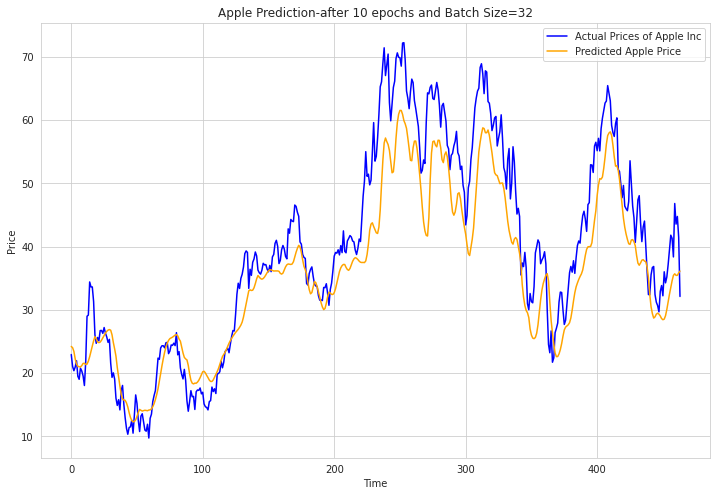

In [199]:
# Visualising time.........Visualizing various results at different epoch and batch size
plt.figure(figsize=(12,8))
plt.plot(y_test, color = 'blue', label = 'Actual Prices of Apple Inc')
plt.plot(y_pred, color = 'orange', label = 'Predicted Apple Price')
plt.title('Apple Prediction-after 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

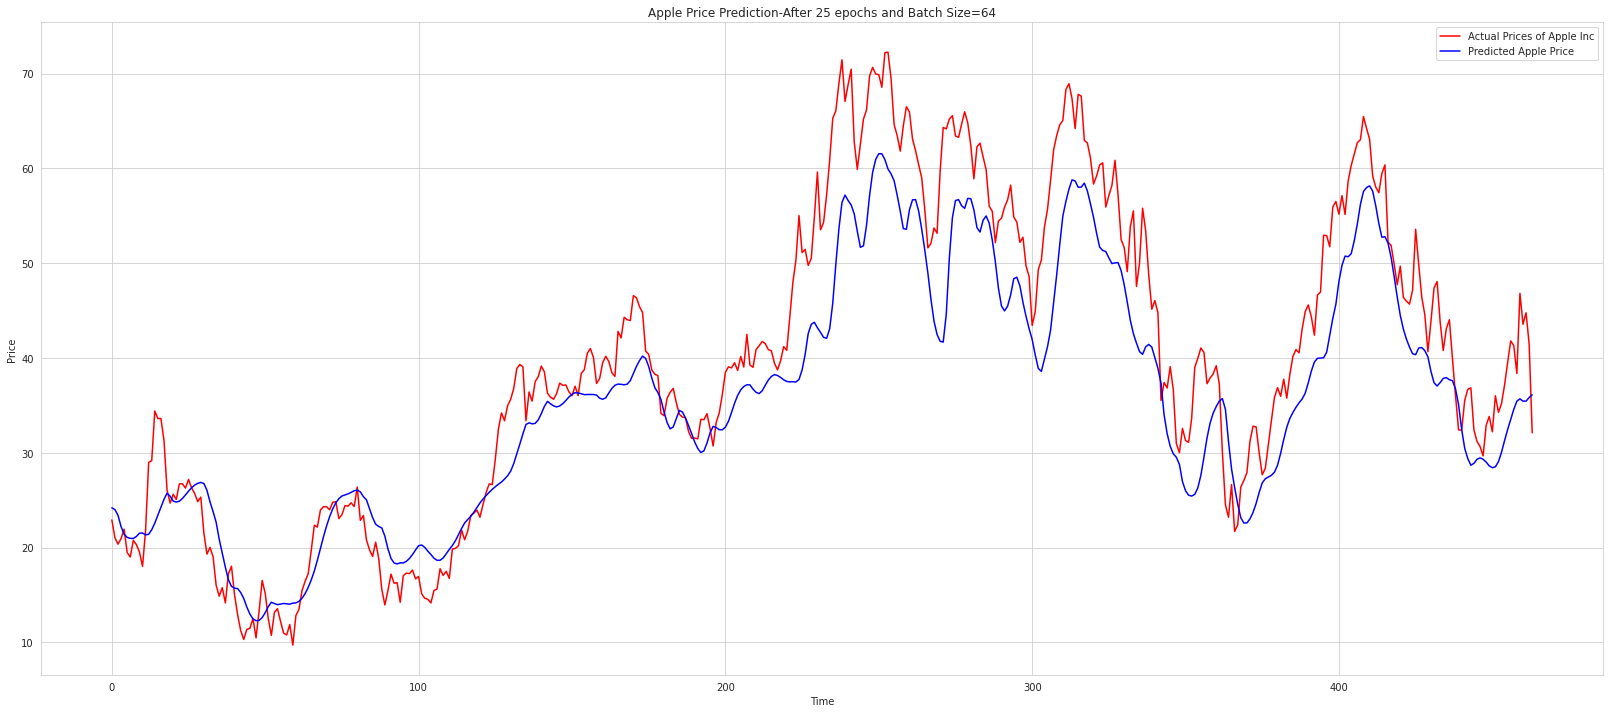

In [200]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Actual Prices of Apple Inc')
plt.plot(y_pred, color = 'blue', label = 'Predicted Apple Price')
plt.title('Apple Price Prediction-After 25 epochs and Batch Size=64')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

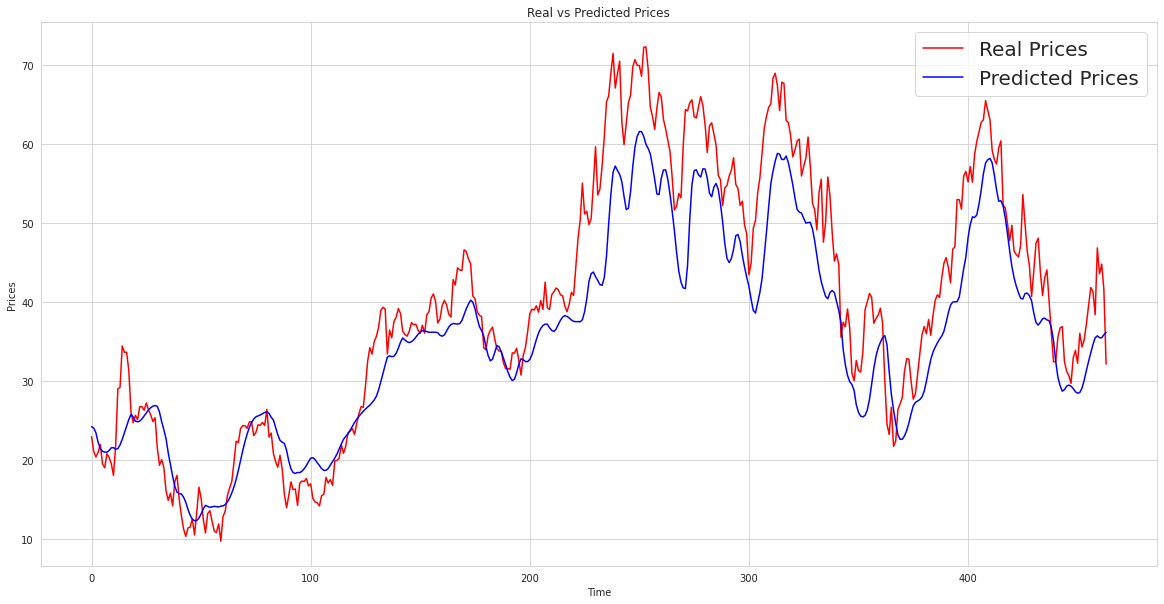

In [201]:
plt.figure(figsize=(20,10))
plt.plot(y_test,'red',label='Real Prices')
plt.plot(y_pred,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)

In [202]:
 print(mean_squared_error(y_test, y_pred, squared = False))

6.722505650193346


In [203]:
 print(mean_squared_error(y_test, y_pred, squared = True))

45.19208221688146


In [205]:
apple_Close= apple.iloc[:, 1:2].values

In [206]:
from sklearn.preprocessing import MinMaxScaler
ss= MinMaxScaler(feature_range=(0,1))
apple_Close_scaled= ss.fit_transform(apple_Close)

In [207]:
apple_Close_scaled[30]

array([0.00069811])

In [208]:
xtrain=[]
ytrain=[]
for i in range(30,len(apple_Close_scaled)):
    xtrain.append(apple_Close_scaled[i-30:i,0])
    ytrain.append(apple_Close_scaled[i,0])

xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [209]:
xtrain= np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtrain.shape

(10070, 30, 1)

In [210]:
regression= Sequential()

#First Input layer and LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,return_sequences=True,kernel_initializer='glorot_uniform',input_shape=(xtrain.shape[1],1)))
regression.add(Dropout(0.2))

# Where:
#     return_sequences: Boolean. Whether to return the last output in the output sequence, or the full sequence.

# Second LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Third LSTM layer with 0.2% dropout
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform',return_sequences=True))
regression.add(Dropout(0.2))

#Fourth LSTM layer with 0.2% dropout, we wont use return sequence true in last layers as we dont want to previous output
regression.add(LSTM(units=50,kernel_initializer='glorot_uniform'))
regression.add(Dropout(0.2))
#Output layer , we wont pass any activation as its continous value model
regression.add(Dense(units=1))

#Compiling the network
regression.compile(optimizer='adam',loss='mean_squared_error')


#fitting the network
regression.fit(xtrain,ytrain,batch_size=30,epochs=100)

Epoch 1/100
336/336 [==============================] - 32s 71ms/step - loss: 9.6487e-04
Epoch 2/100
336/336 [==============================] - 23s 69ms/step - loss: 6.2452e-04
Epoch 3/100
336/336 [==============================] - 25s 75ms/step - loss: 5.0838e-04
Epoch 4/100
336/336 [==============================] - 23s 69ms/step - loss: 3.5063e-04
Epoch 5/100
336/336 [==============================] - 22s 66ms/step - loss: 3.8795e-04
Epoch 6/100
336/336 [==============================] - 23s 69ms/step - loss: 3.5583e-04
Epoch 7/100
336/336 [==============================] - 23s 68ms/step - loss: 3.6324e-04
Epoch 8/100
336/336 [==============================] - 23s 67ms/step - loss: 2.9488e-04
Epoch 9/100
336/336 [==============================] - 26s 77ms/step - loss: 3.8150e-04
Epoch 10/100
336/336 [==============================] - 23s 69ms/step - loss: 3.6356e-04
Epoch 11/100
336/336 [==============================] - 23s 68ms/step - loss: 2.8827e-04
Epoch 12/100
336/336 [========

In [212]:
testdata_Close= testdata.iloc[:, 1:2].values #taking  Close price
total= pd.concat([apple['Close'],testdata['Close']],axis=0) # Concating train and test and then will take last 60 train point
testdata_input = total[len(total)-len(testdata)-30:].values
testdata_input= testdata_input.reshape(-1,1) # reshaping it to get it transformed
testdata_input= ss.transform(testdata_input)


In [213]:
xtest= []
for i in range(30,80):
    xtest.append(testdata_input[i-30:i,0]) #creating input for lstm prediction

In [214]:
xtest= np.array(xtest)

In [215]:
xtest= np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))
predicted_value= regression.predict(xtest)

2/2 [==============================] - 2s 18ms/step


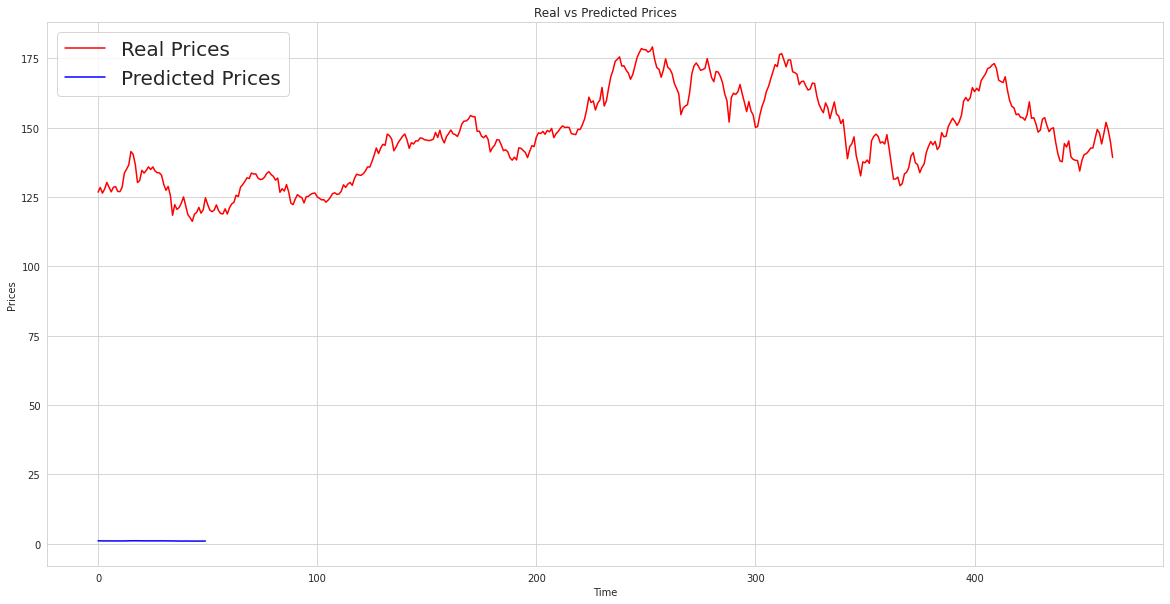

In [216]:
plt.figure(figsize=(20,10))
plt.plot(testdata_Close,'red',label='Real Prices')
plt.plot(predicted_value,'blue',label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.title('Real vs Predicted Prices')
plt.legend(loc='best', fontsize=20)